In [56]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [124]:
import numpy as np
import dill
import os


class Data:
    def __init__(self, column_names, data):
        
        self.names = column_names
        self.data = data
        
        n = {}
        for key, value in enumerate(self.names):
            n[value] = key
        self.n = n
        
    def get(self, *args) -> np.ndarray:
        out = []
        for arg in args:
            out.append(self.data[:, self.n[arg]])
        out = np.asarray(out)
        if len(args) == 1:
            return out[0]
        return out
        
    def dist(self, prefix: str) -> 'Data':
        cond = np.asarray([str(distr_name).find(prefix) + 1
                           for distr_name in self.get('distr_name')], dtype=bool)
        return Data(column_names=self.names, data=self.data[cond])
        
    def select(self, **kwargs) -> 'Data':
        cond = np.asarray([True for _ in range(len(self.data))])
        for key, value in kwargs.items():
            d = self.get(str(key)).astype(type(value))
            cond = np.isclose(d, value) & cond
        return Data(column_names=self.names, data=self.data[cond])
    

def means(arr) -> float:
    return np.asarray([val.mean for val in arr])

def mins(arr) -> float:
    return np.asarray([val.min for val in arr])

def maxs(arr) -> float:
    return np.asarray([val.max for val in arr])


def bind(*arrays):
    return tuple(np.asarray(sorted(list(zip(*arrays)), key=lambda e: e[0])).T)


linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))
}

In [58]:
with open('post_data_theta0_kernel60_distrL2.bin.part', 'rb') as dump:
    data = dill.load(dump)

In [ ]:
data[0]

In [59]:
data = Data(column_names=data[0], data=data[1:])

In [60]:
len(data.data)

2823

In [61]:
len(data.dist('L2').data)

1854

In [62]:
len(data.dist('L3').data)

969

In [63]:
percentages = np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))
percentages

array([0.2, 0.22631578947368422, 0.25263157894736843, 0.2789473684210526,
       0.30526315789473685, 0.3315789473684211, 0.35789473684210527,
       0.38421052631578945, 0.4105263157894737, 0.4368421052631579,
       0.4631578947368421, 0.48947368421052634, 0.5157894736842106,
       0.5421052631578946, 0.5684210526315789, 0.5947368421052632,
       0.6210526315789473, 0.6473684210526316, 0.6736842105263158, 0.7],
      dtype=object)

<IPython.core.display.Javascript object>


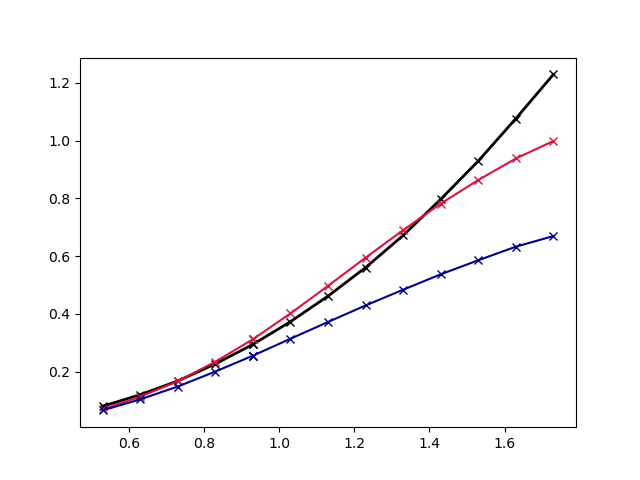

In [136]:
eta, *W = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
       'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
    )

eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

plt.figure()
plt.plot(eta, W_true, marker='x', color='black', linewidth=2)
plt.plot(eta, Wr, marker='x', color='crimson', linewidth=1.5)
plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5)

<IPython.core.display.Javascript object>


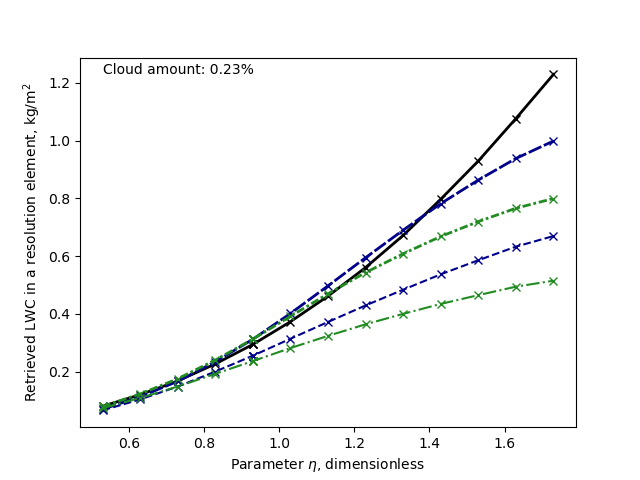

Text(0, 0.5, 'Retrieved LWC in a resolution element, kg/m$^2$')

In [121]:
plt.figure()

# plt.title('L2')

eta, *W = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
       'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
    )

eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.2f}%'.format(0.23423))

plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


eta, *W = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
       'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
    )

eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

plt.xlabel(r'Parameter $\eta$, dimensionless')
plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')

<IPython.core.display.Javascript object>


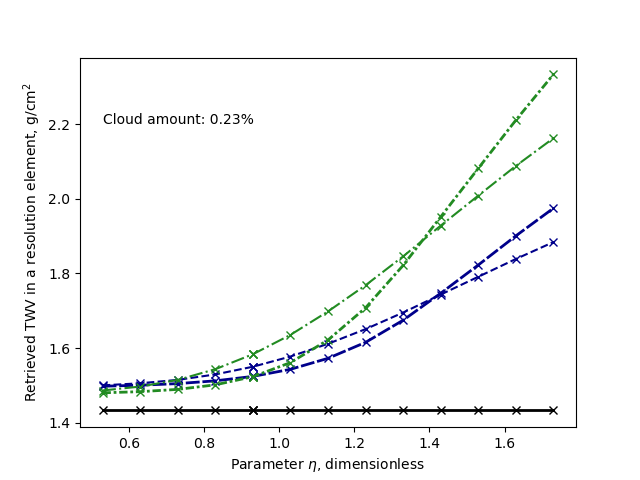

Text(0, 0.5, 'Retrieved TWV in a resolution element, g/cm$^2$')

In [132]:
plt.figure()

# plt.title('L2')

eta, *Q = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
       'eta', 'Q_true', 'Qr', 'Qrs', 'efl_Qrss'
    )

eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
plt.text(np.min(eta), 2.2, 'Cloud amount: {:.2f}%'.format(0.23423))

plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


eta, *Q = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
       'eta', 'Q_true', 'Qr', 'Qrs', 'efl_Qrss'
    )

eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

plt.xlabel(r'Parameter $\eta$, dimensionless')
plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')

### Generate animations (dynamic y-axis)

#### eta variance

##### LWC

<IPython.core.display.Javascript object>


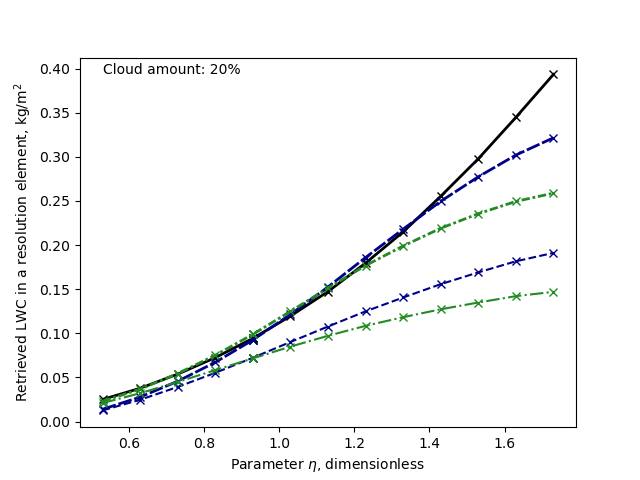

<IPython.core.display.Javascript object>


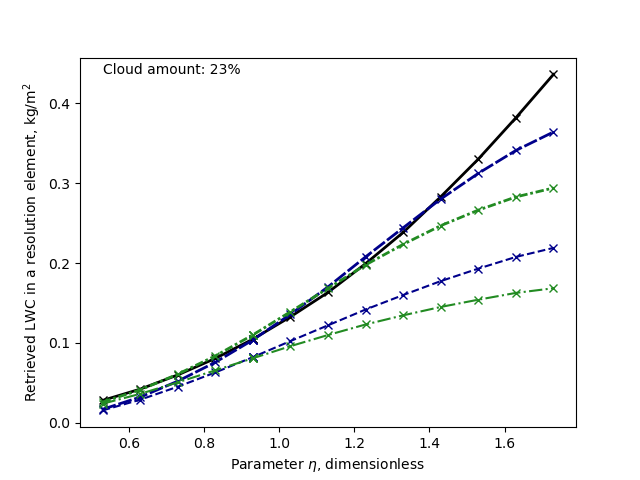

<IPython.core.display.Javascript object>


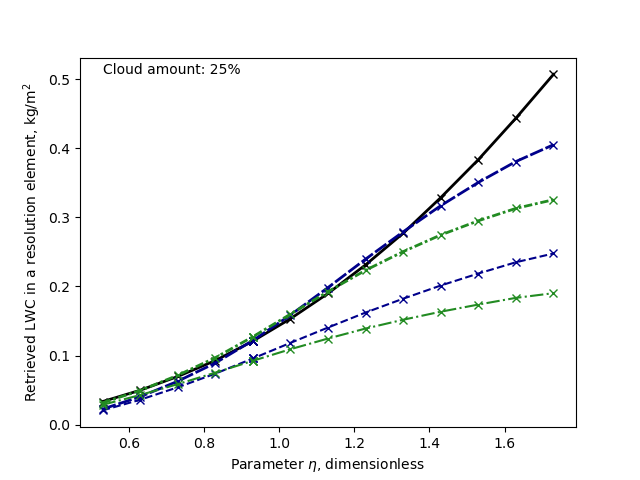

<IPython.core.display.Javascript object>


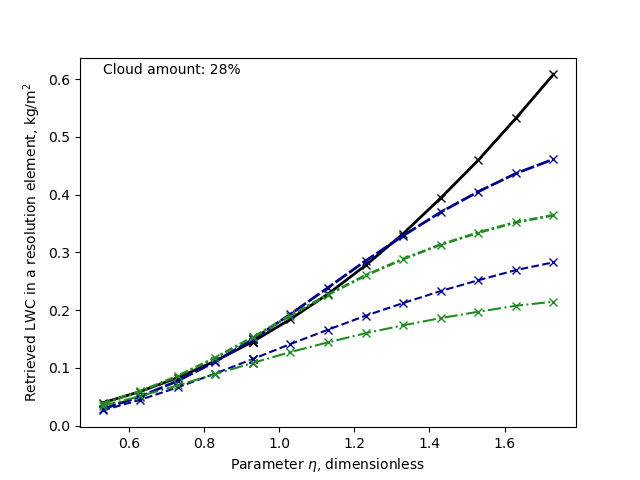

<IPython.core.display.Javascript object>


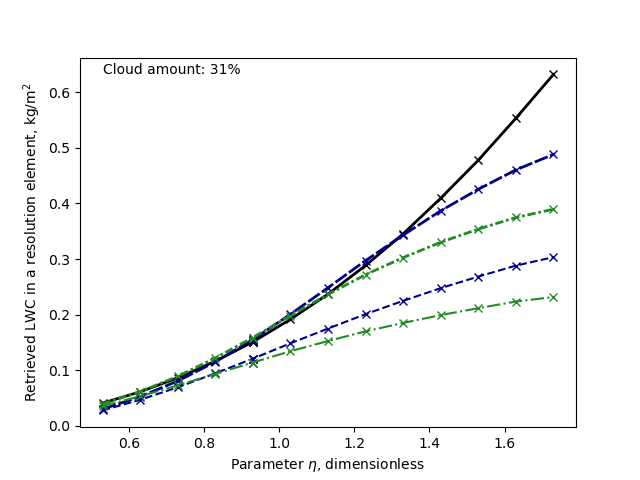

<IPython.core.display.Javascript object>


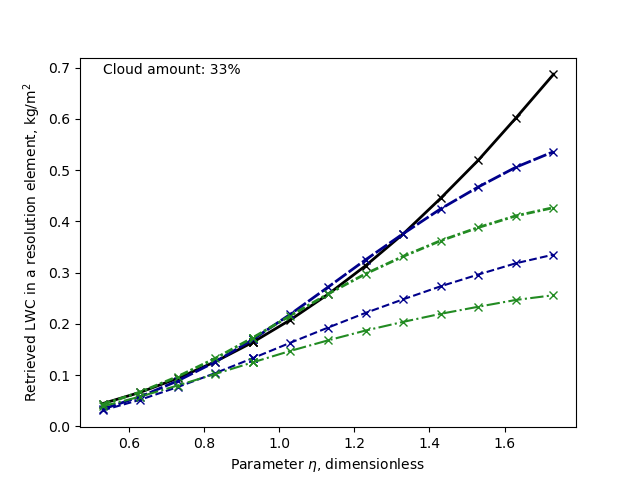

<IPython.core.display.Javascript object>


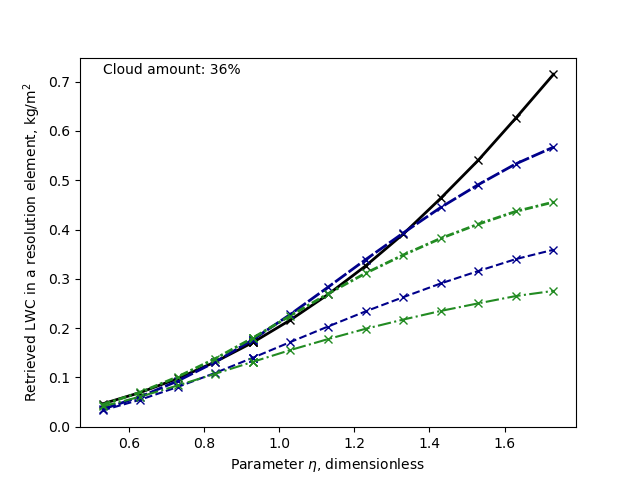

<IPython.core.display.Javascript object>


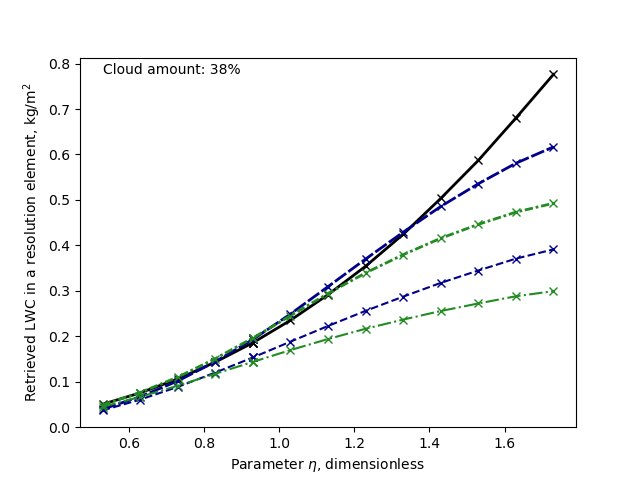

<IPython.core.display.Javascript object>


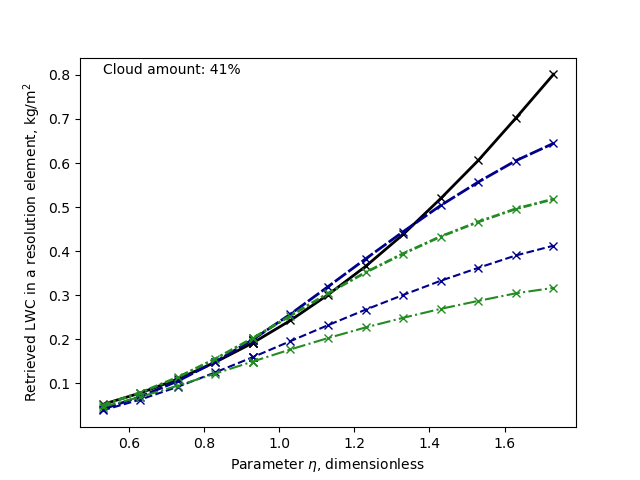

<IPython.core.display.Javascript object>


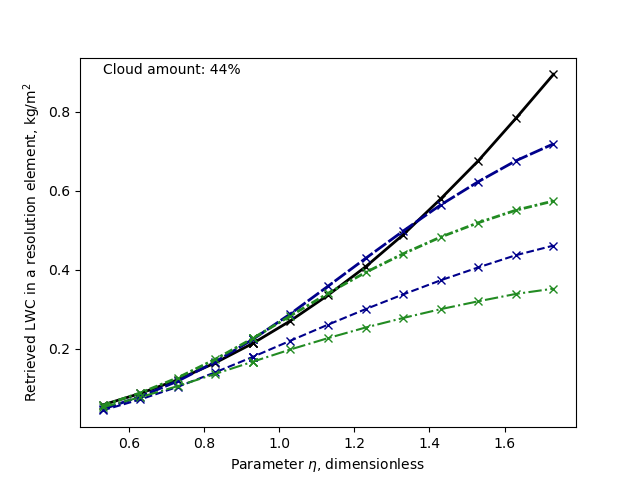

<IPython.core.display.Javascript object>


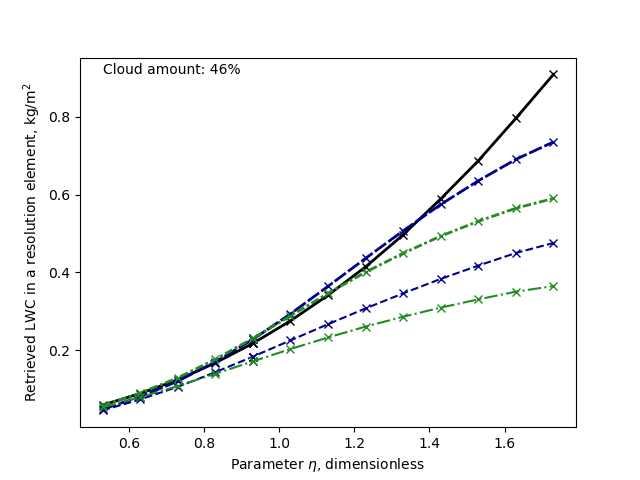

<IPython.core.display.Javascript object>


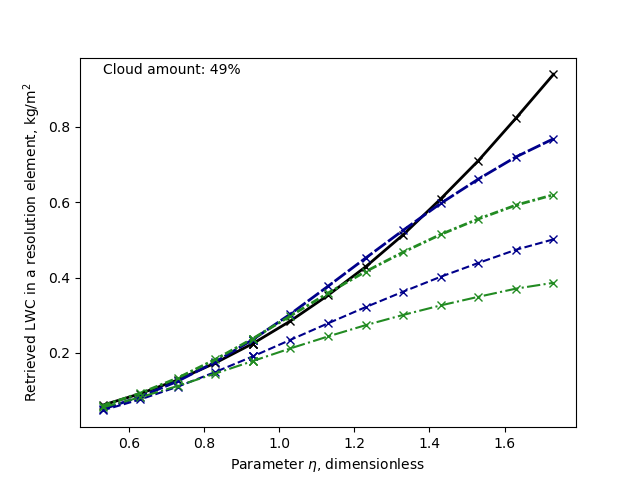

<IPython.core.display.Javascript object>


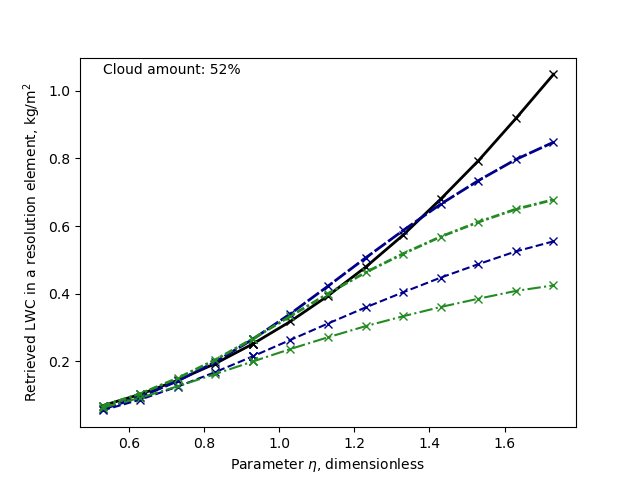

<IPython.core.display.Javascript object>


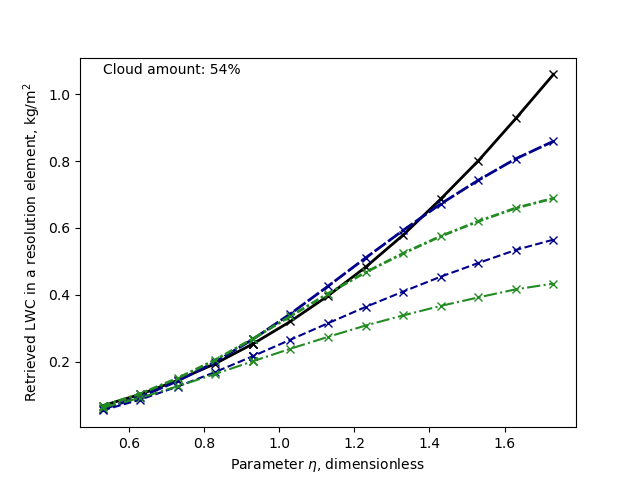

<IPython.core.display.Javascript object>


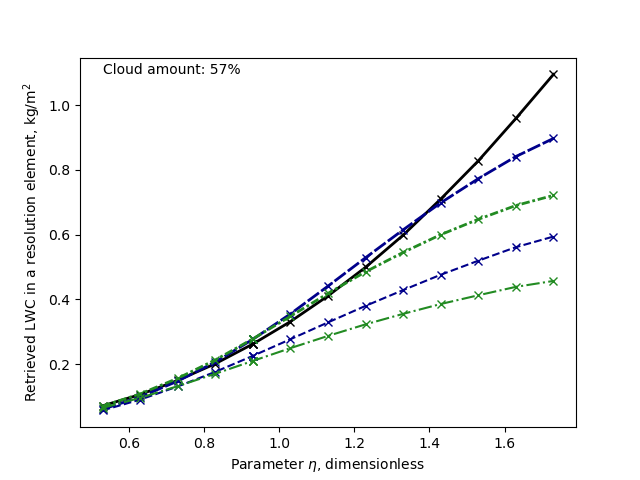

<IPython.core.display.Javascript object>


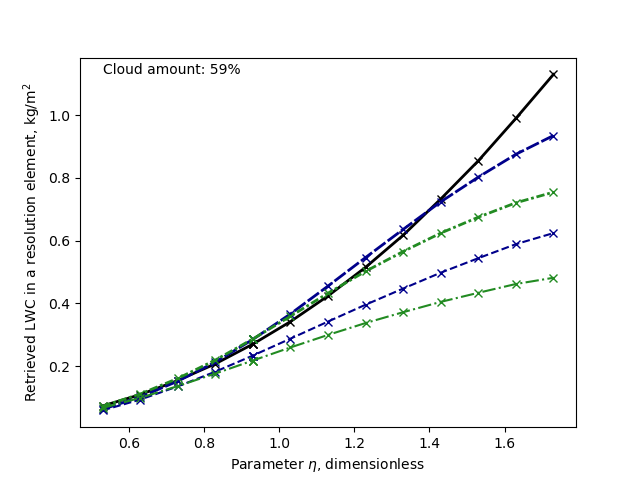

/tmp/ipykernel_55398/2500526531.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


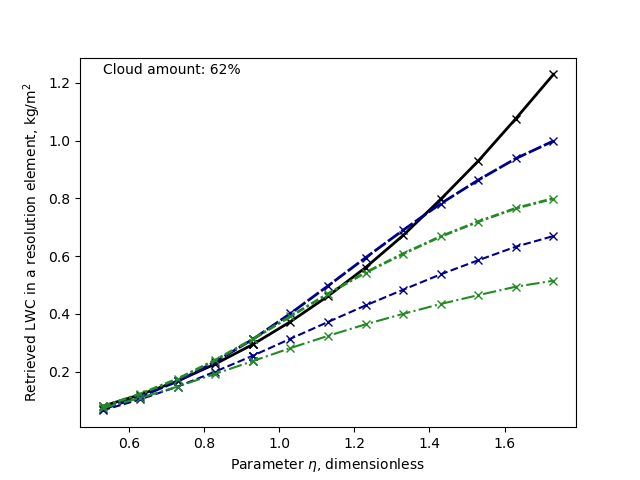

<IPython.core.display.Javascript object>


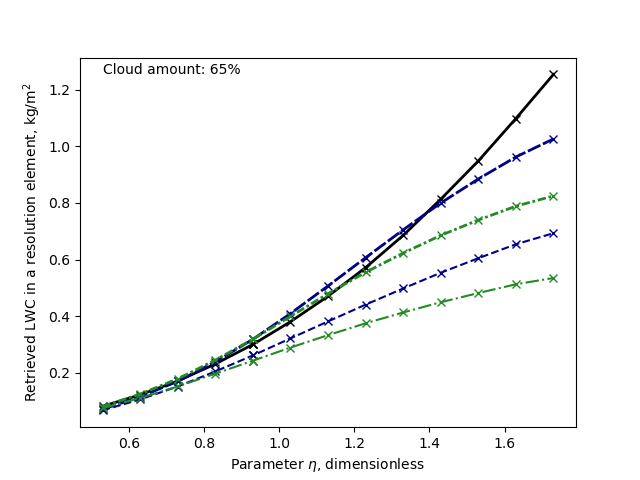

<IPython.core.display.Javascript object>


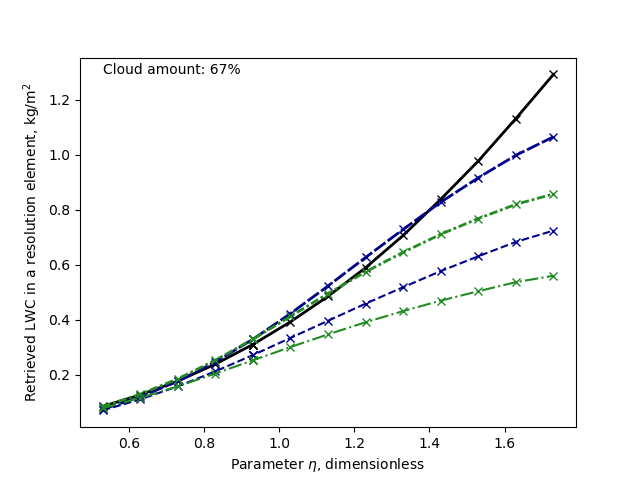

<IPython.core.display.Javascript object>


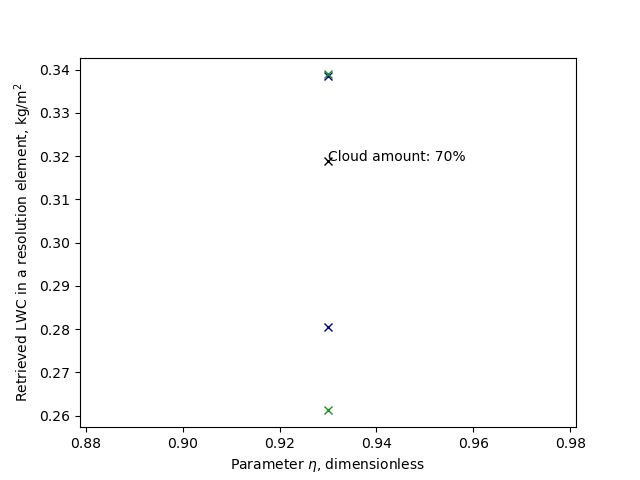

In [131]:
savepath = os.path.join('fig', 'L2', 'eta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
    plt.figure()

    # plt.title('L2')

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
        )

    eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

    plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
    plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

    plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
    plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
        )

    eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

    plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
    plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

<IPython.core.display.Javascript object>


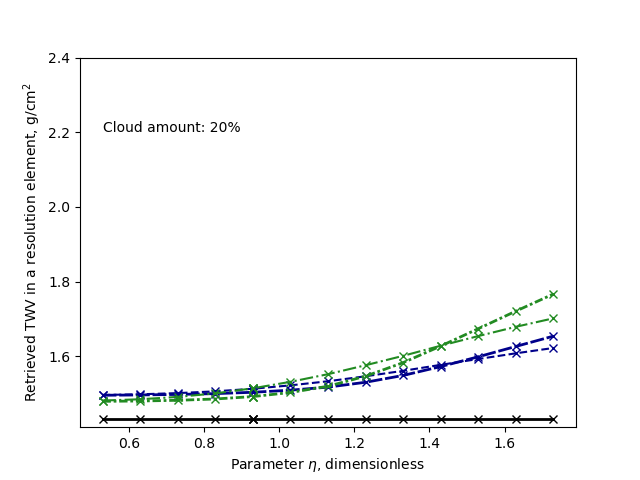

<IPython.core.display.Javascript object>


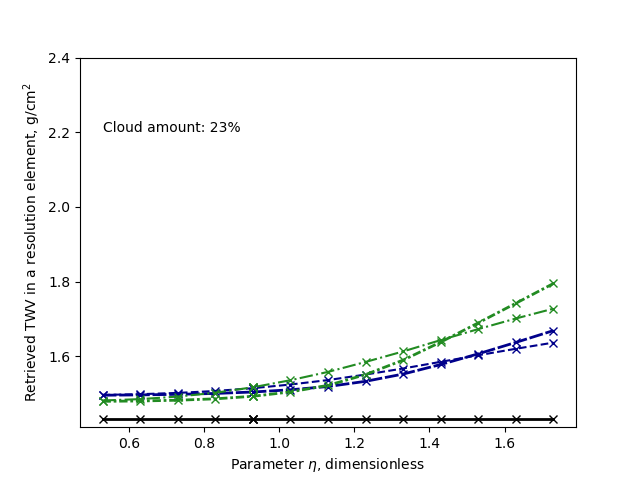

<IPython.core.display.Javascript object>


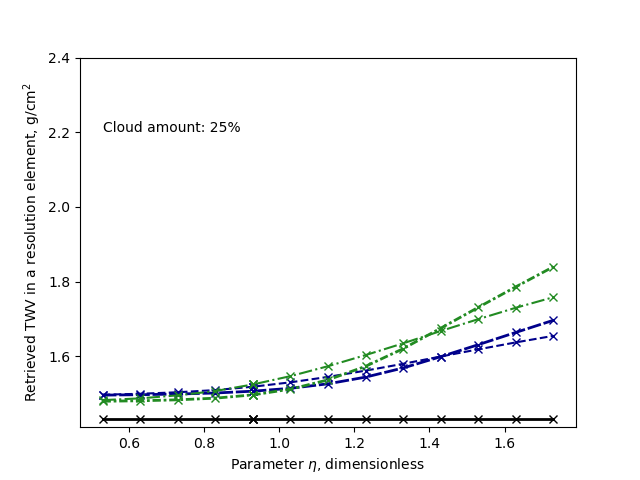

<IPython.core.display.Javascript object>


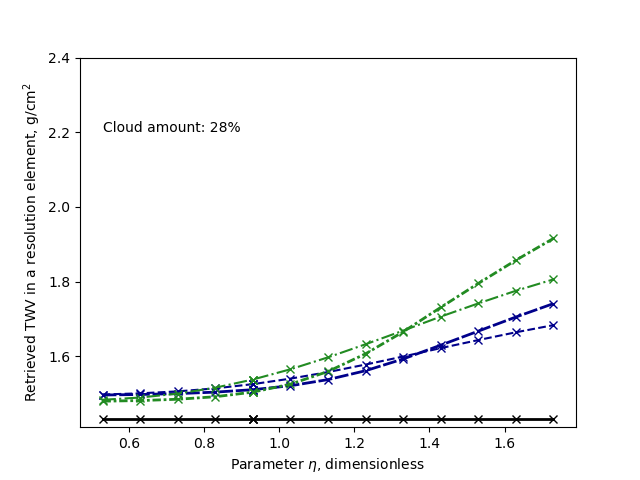

<IPython.core.display.Javascript object>


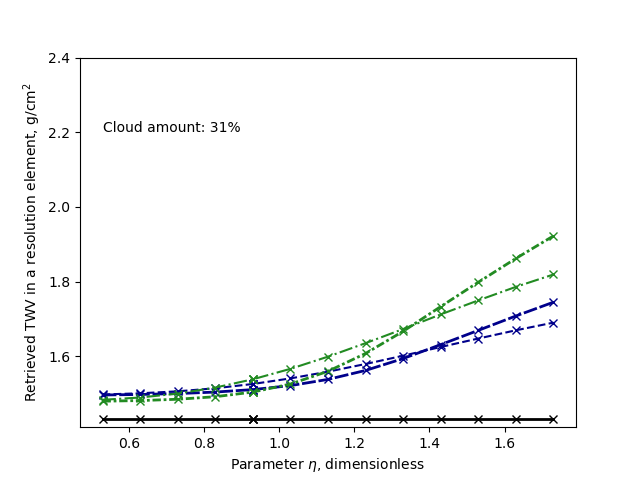

<IPython.core.display.Javascript object>


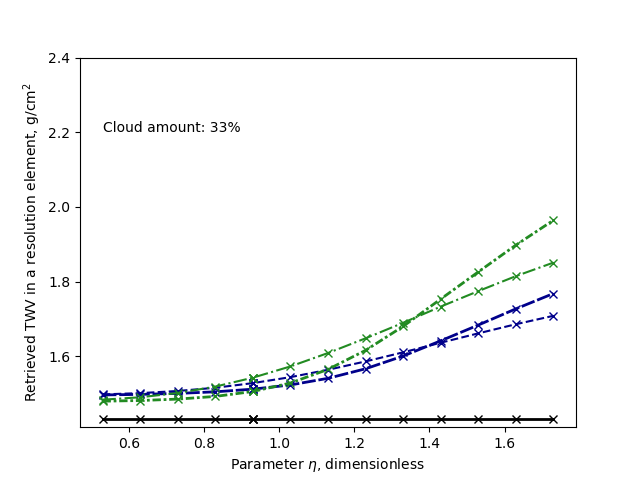

<IPython.core.display.Javascript object>


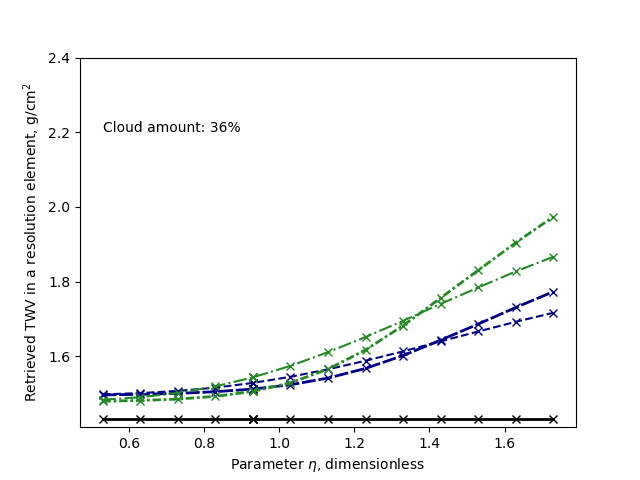

<IPython.core.display.Javascript object>


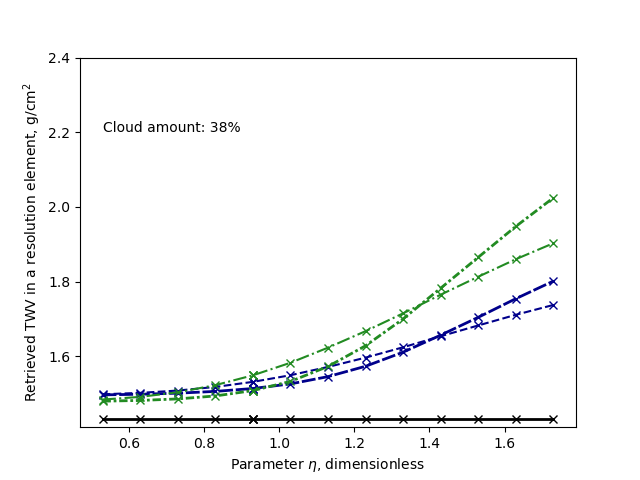

<IPython.core.display.Javascript object>


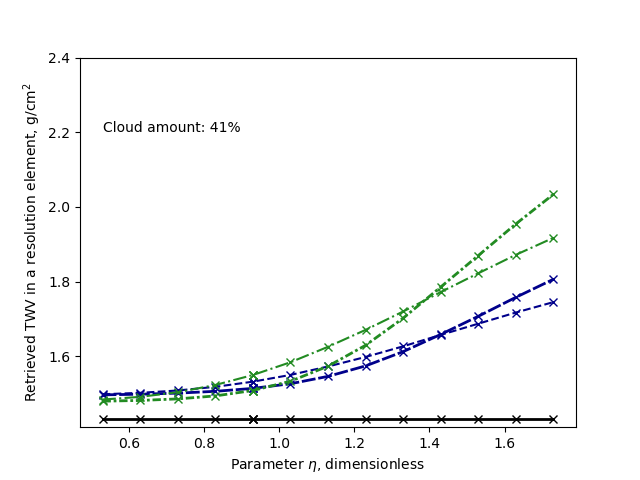

<IPython.core.display.Javascript object>


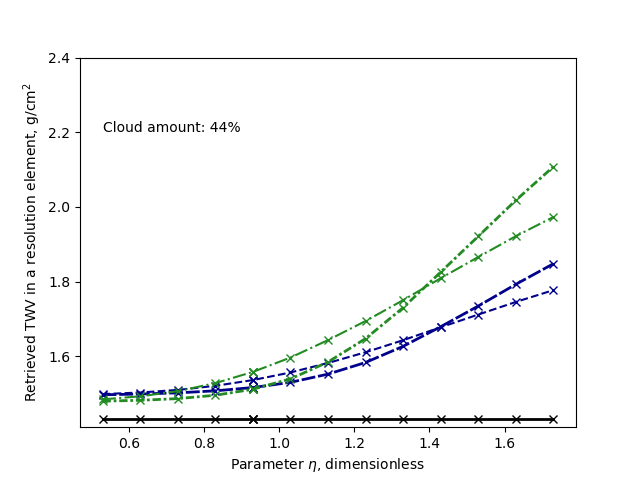

<IPython.core.display.Javascript object>


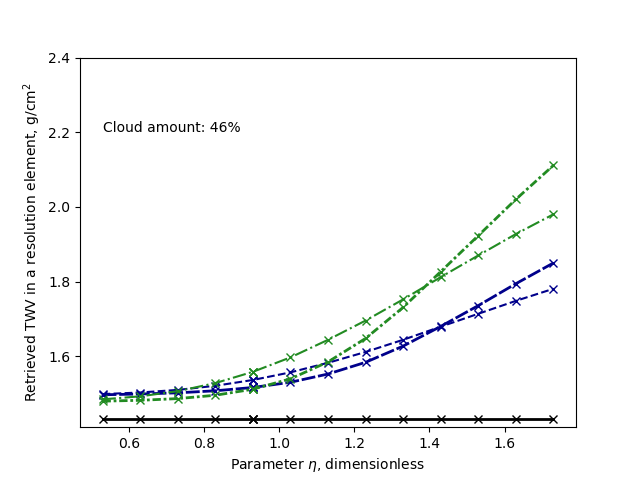

<IPython.core.display.Javascript object>


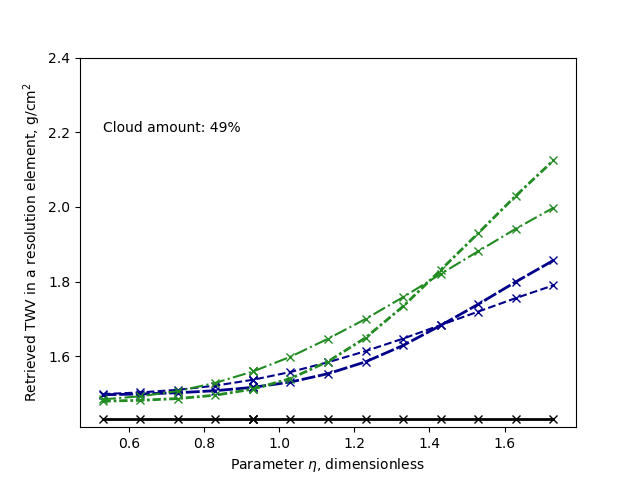

<IPython.core.display.Javascript object>


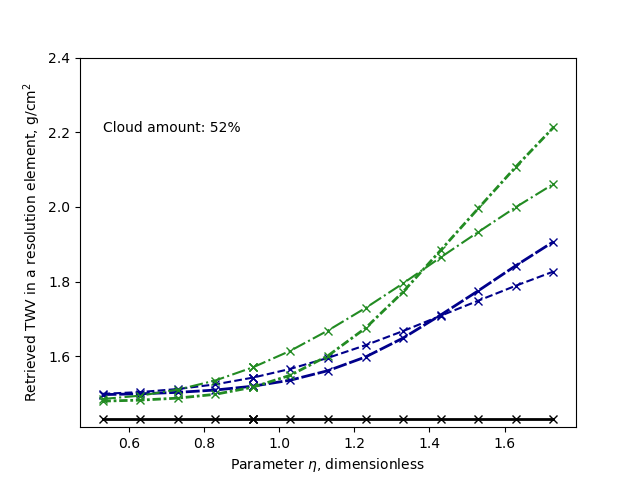

<IPython.core.display.Javascript object>


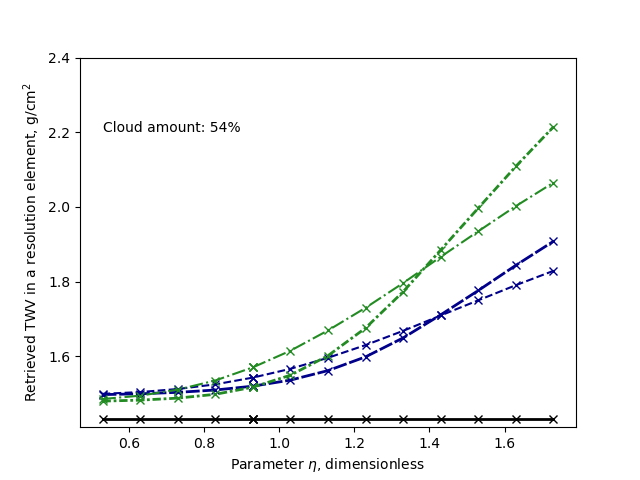

<IPython.core.display.Javascript object>


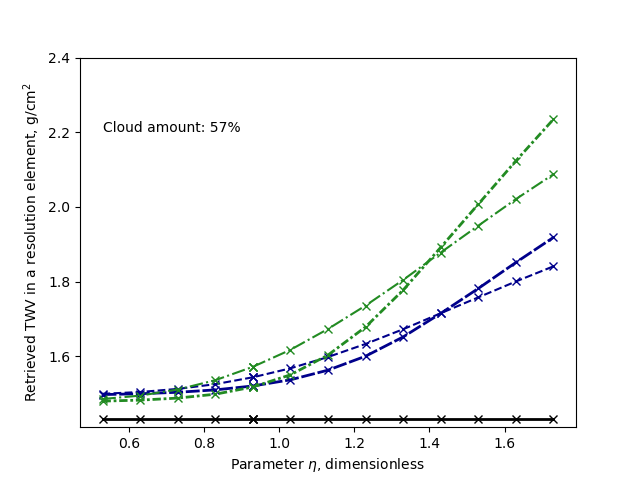

<IPython.core.display.Javascript object>


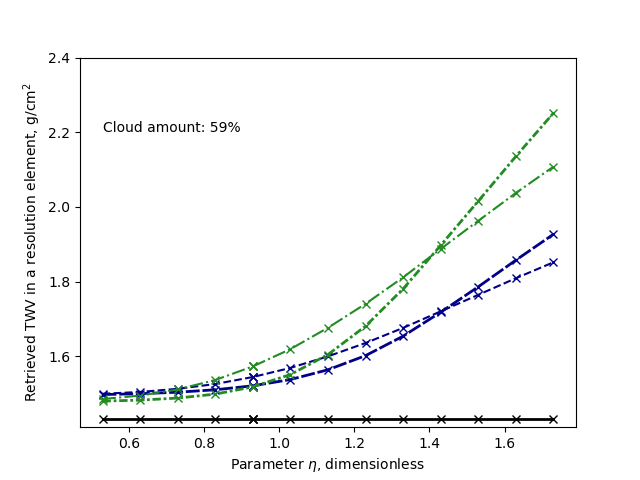

<IPython.core.display.Javascript object>


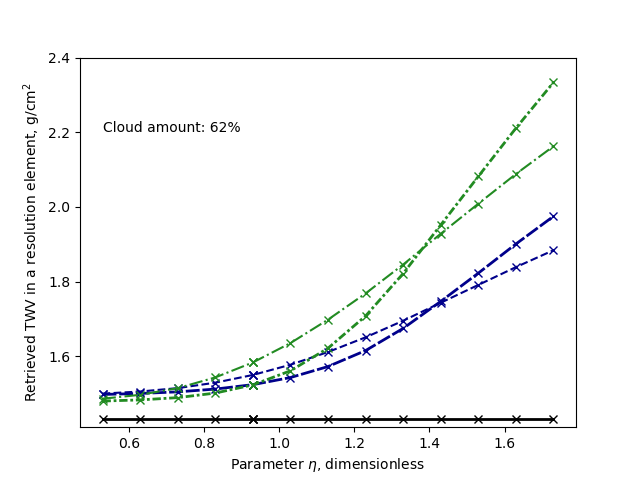

<IPython.core.display.Javascript object>


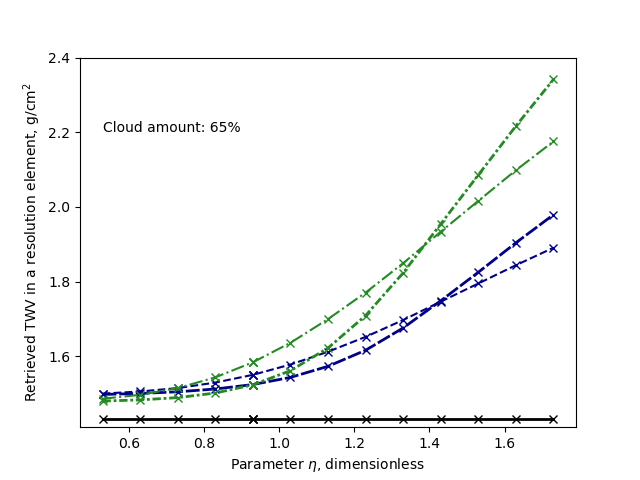

<IPython.core.display.Javascript object>


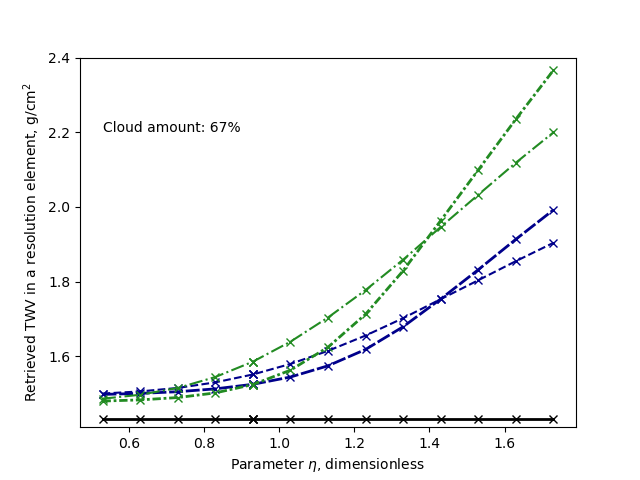

<IPython.core.display.Javascript object>


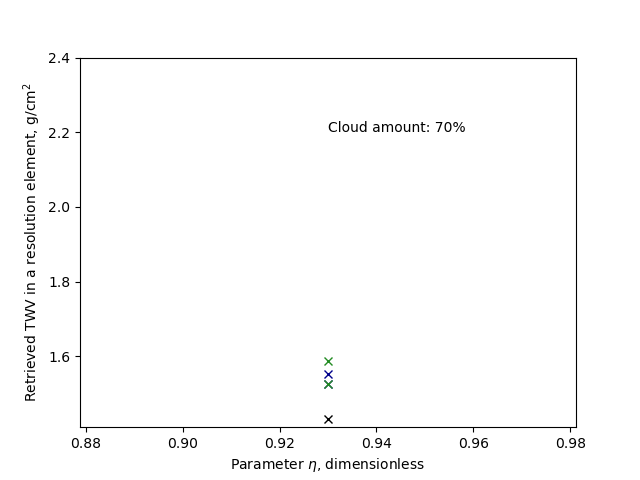

In [134]:
savepath = os.path.join('fig', 'L2', 'eta_variance', 'TWV')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
    plt.figure()

    # plt.title('L2')

    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'Q_true', 'Qr', 'Qrs', 'efl_Qrss'
        )

    eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

    plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
    plt.text(np.min(eta), 2.2, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

    plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
    plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'Q_true', 'Qr', 'Qrs', 'efl_Qrss'
        )

    eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

    plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
    plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')
    
    plt.ylim((1.41, 2.4))
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

#### beta variance

##### LWC

<IPython.core.display.Javascript object>


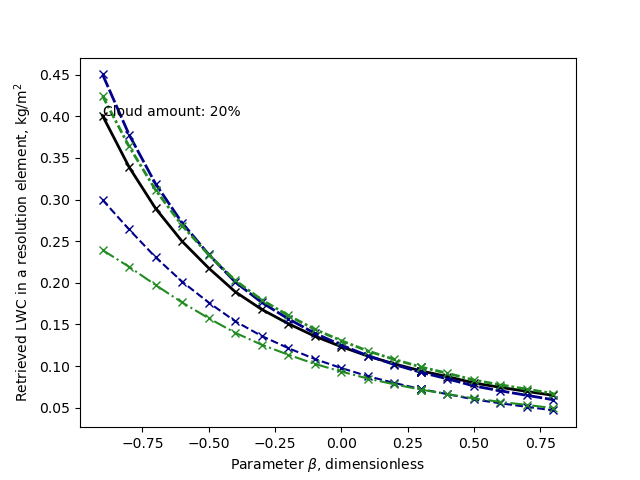

<IPython.core.display.Javascript object>


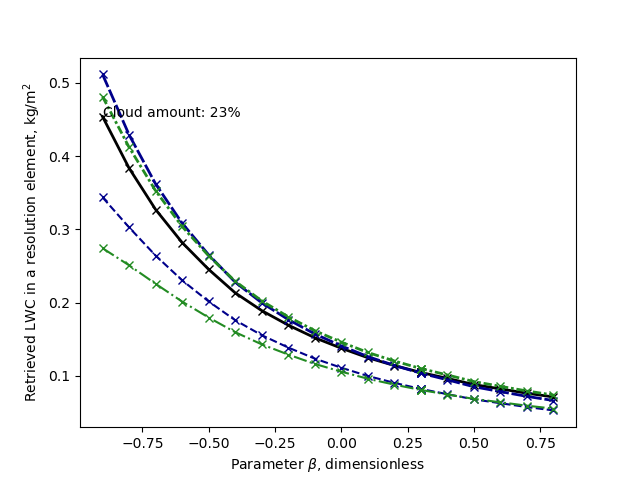

<IPython.core.display.Javascript object>


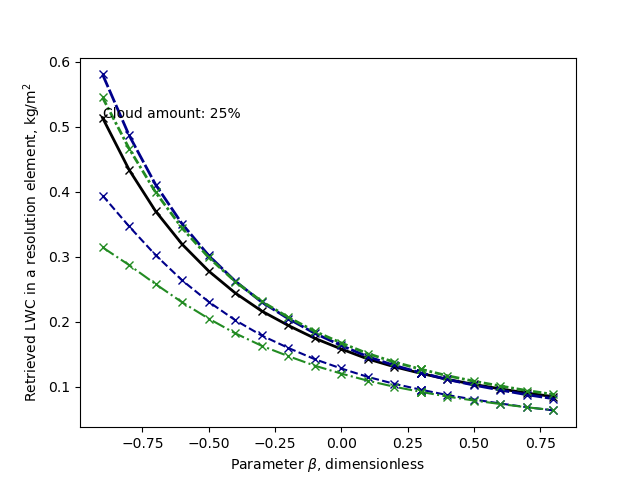

<IPython.core.display.Javascript object>


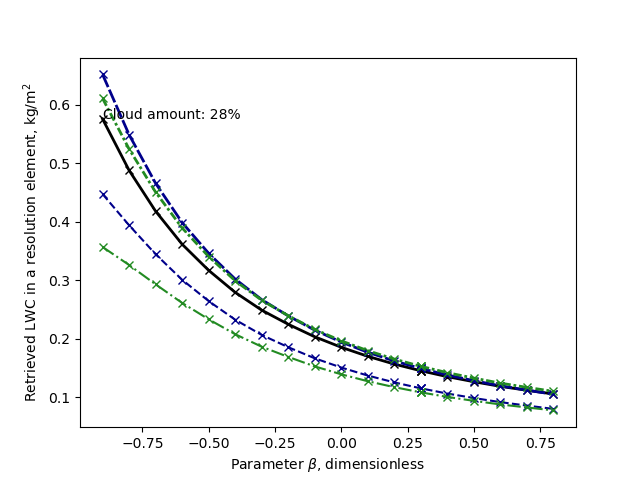

<IPython.core.display.Javascript object>


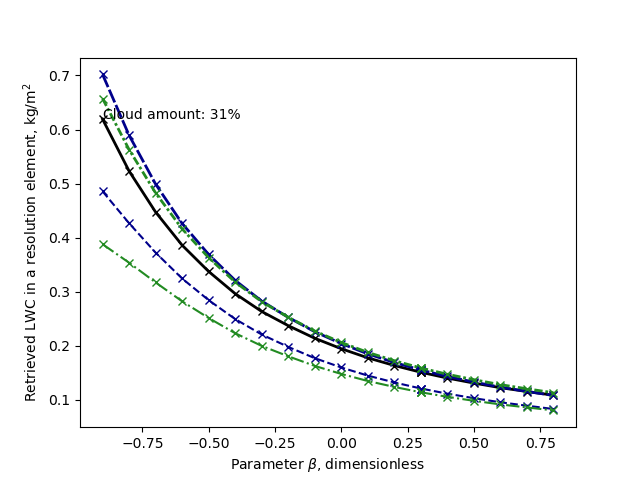

<IPython.core.display.Javascript object>


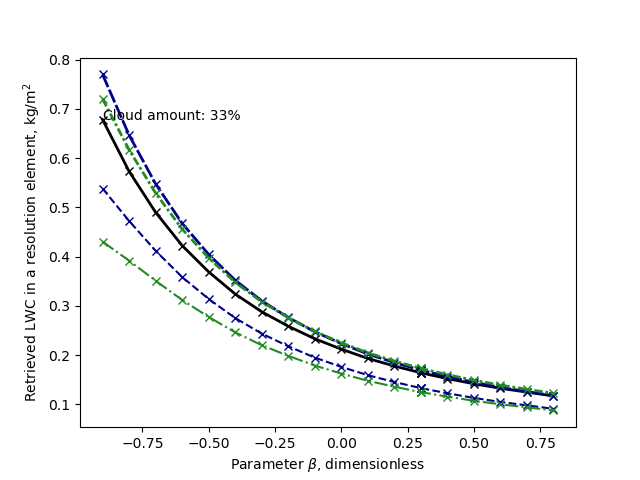

<IPython.core.display.Javascript object>


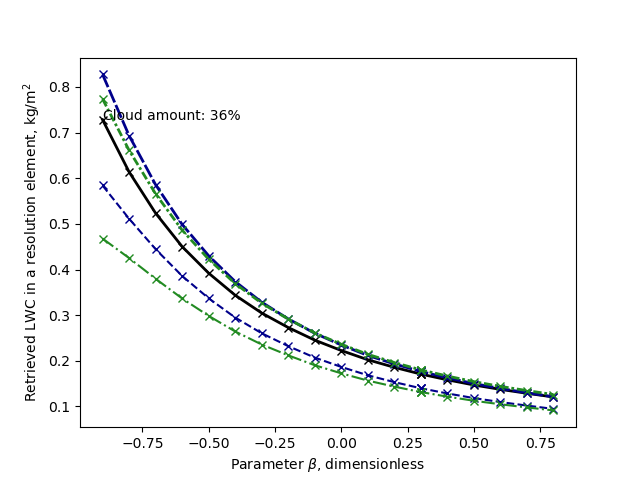

<IPython.core.display.Javascript object>


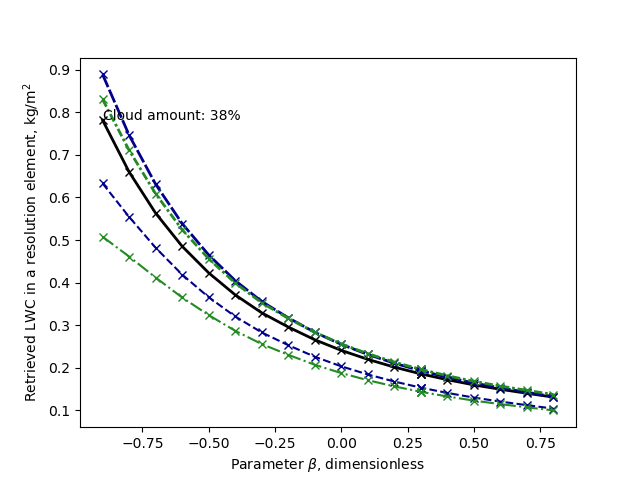

<IPython.core.display.Javascript object>


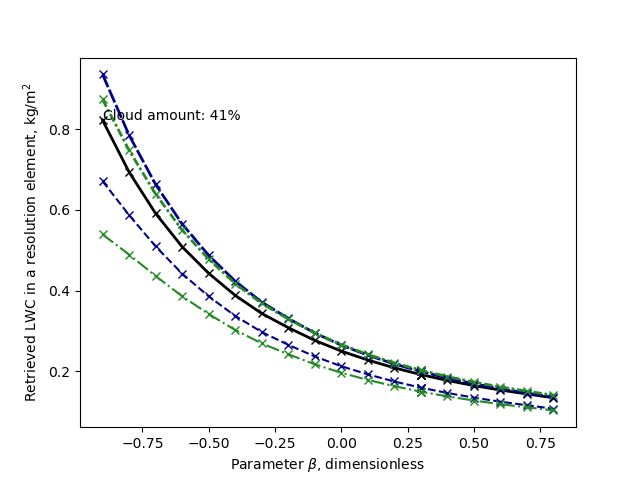

<IPython.core.display.Javascript object>


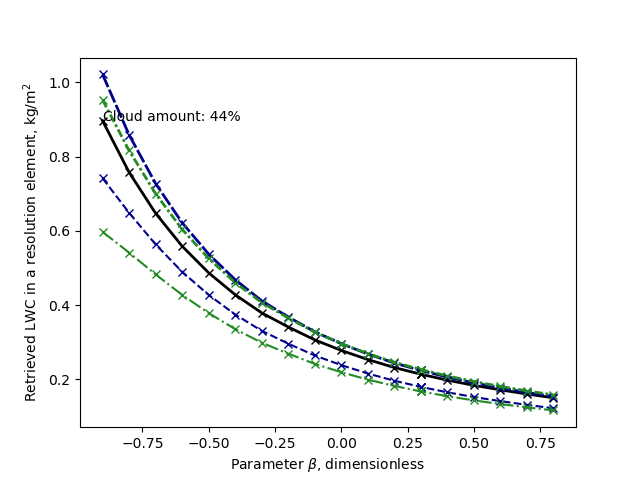

<IPython.core.display.Javascript object>


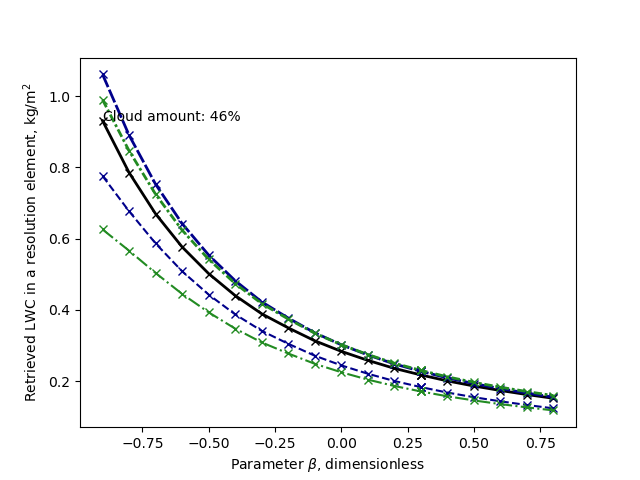

<IPython.core.display.Javascript object>


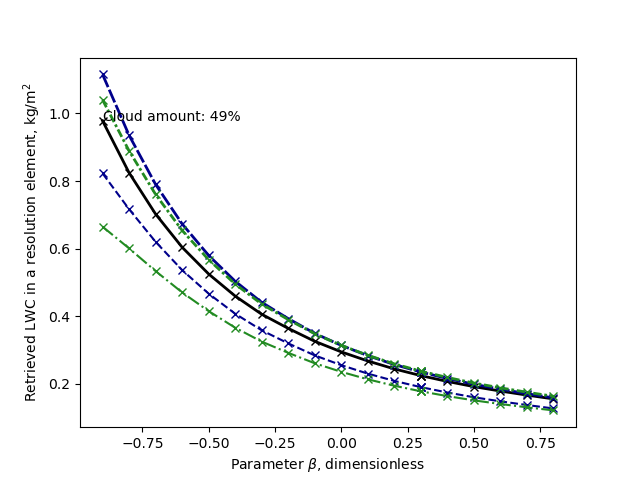

<IPython.core.display.Javascript object>


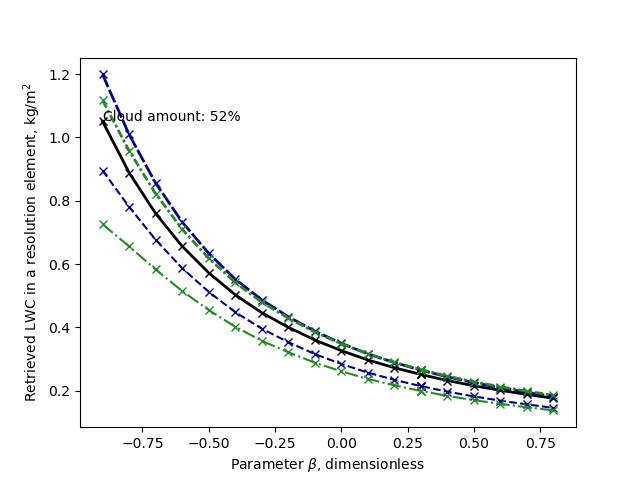

<IPython.core.display.Javascript object>


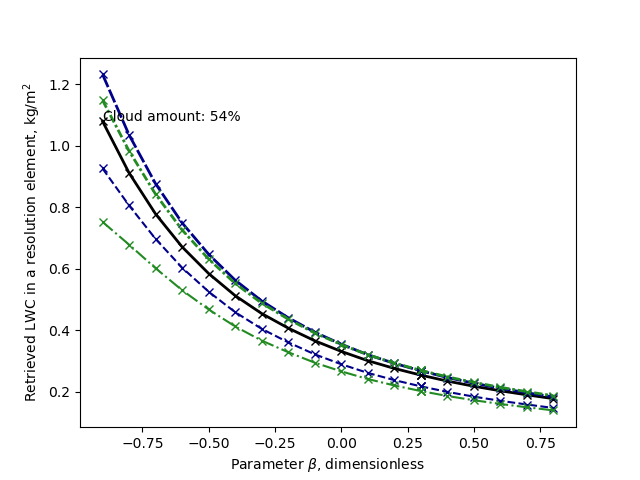

<IPython.core.display.Javascript object>


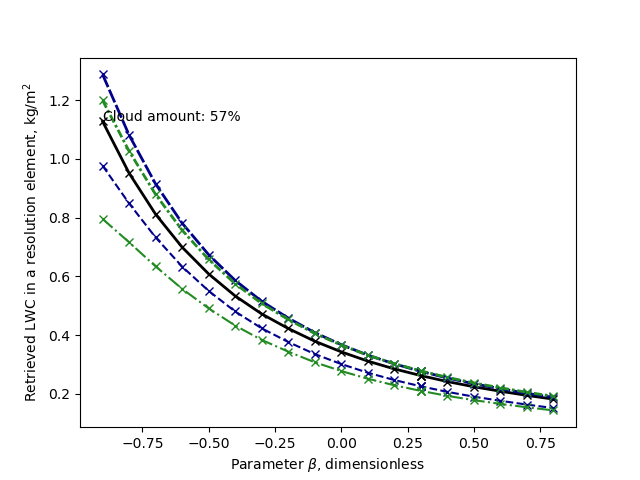

<IPython.core.display.Javascript object>


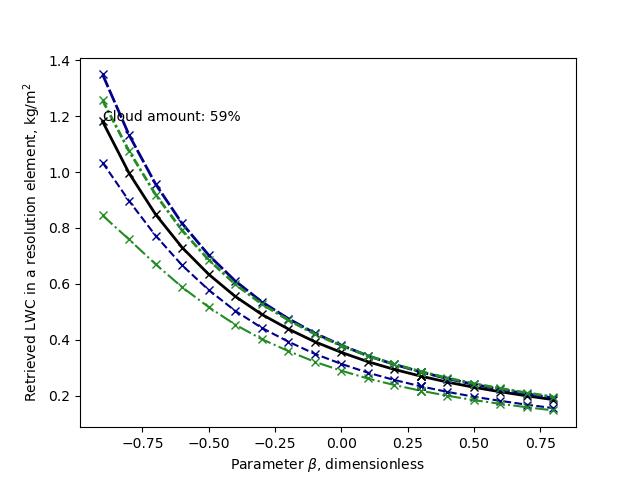

<IPython.core.display.Javascript object>


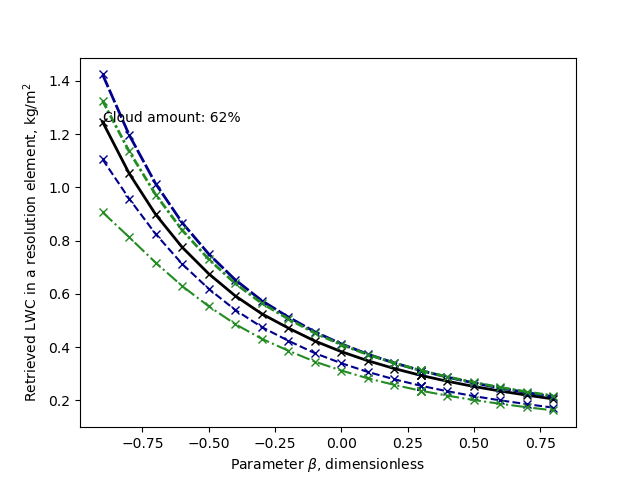

<IPython.core.display.Javascript object>


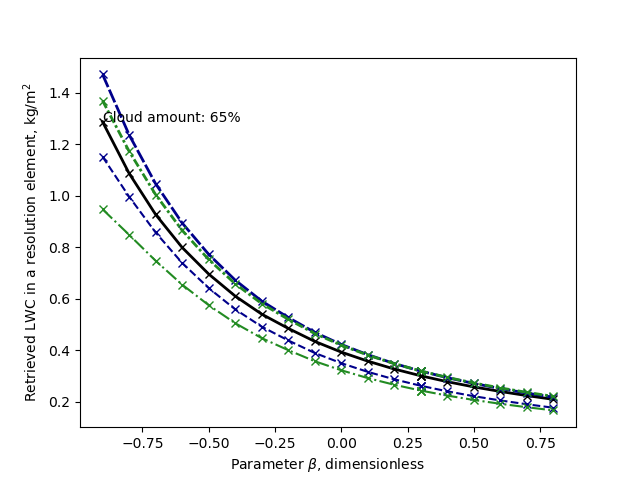

<IPython.core.display.Javascript object>


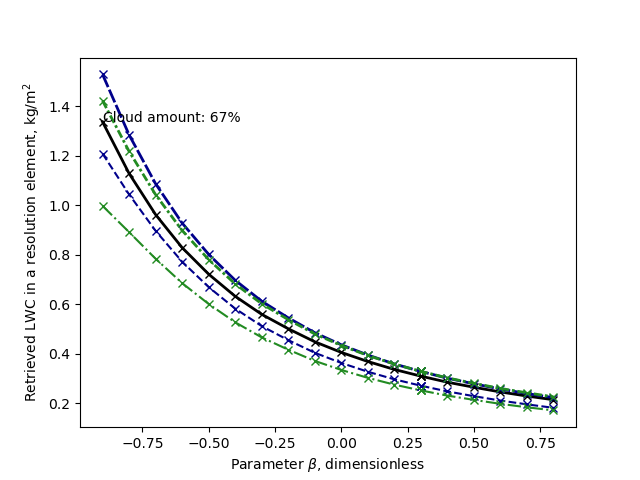

<IPython.core.display.Javascript object>


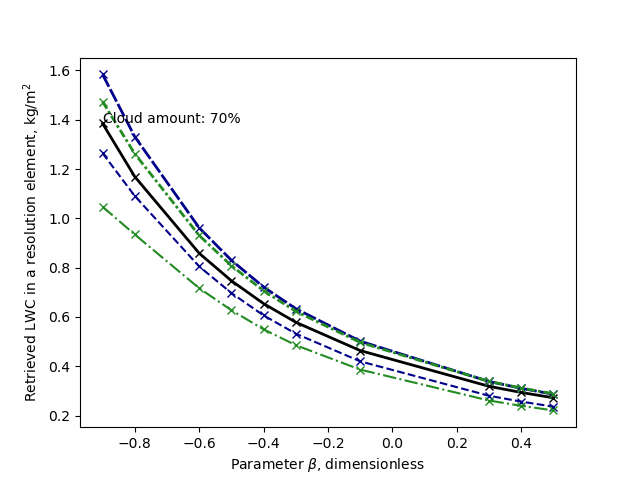

In [139]:
savepath = os.path.join('fig', 'L2', 'beta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))):
    
    plt.figure()

    # plt.title('L2')

    eta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
           'beta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
        )

    eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

    plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
    plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

    plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
    plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


    eta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
           'beta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
        )

    eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

    plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
    plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

    plt.xlabel(r'Parameter $\beta$, dimensionless')
    plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

### Generate animations (fixed y-axis)

#### eta variance

##### LWC

<IPython.core.display.Javascript object>


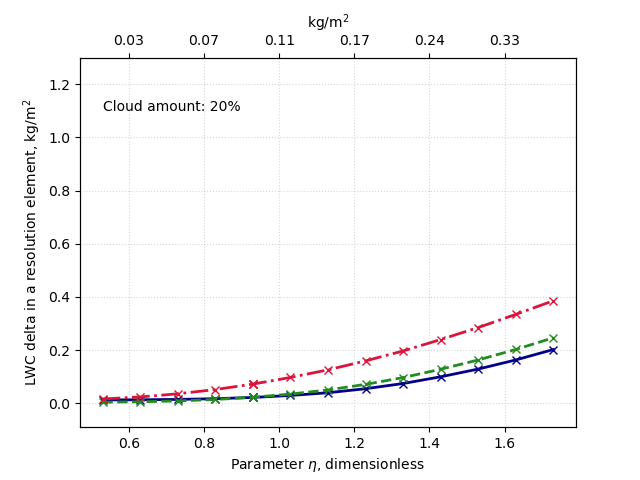

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


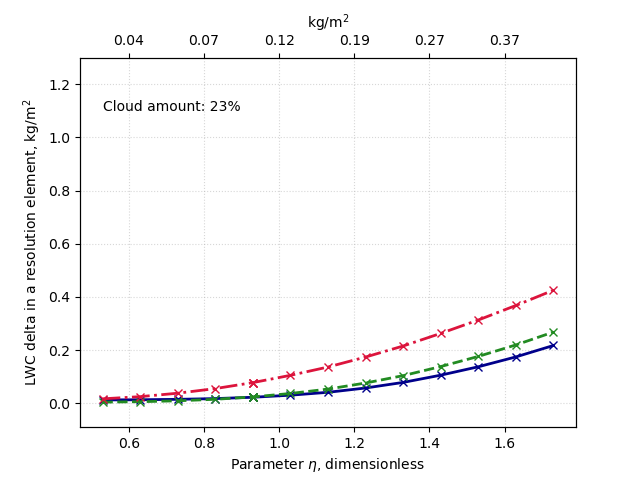

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


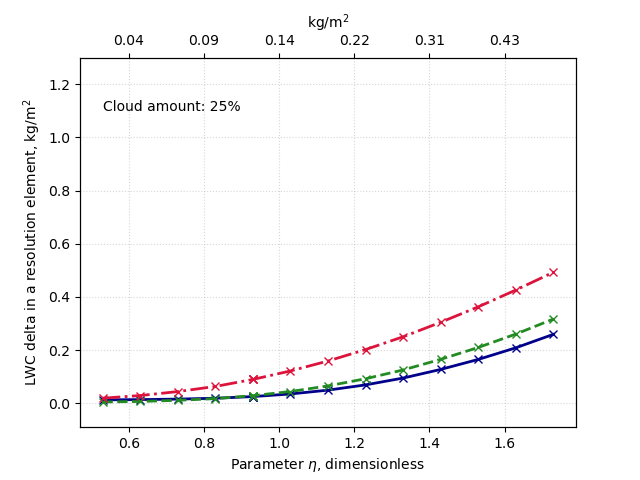

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


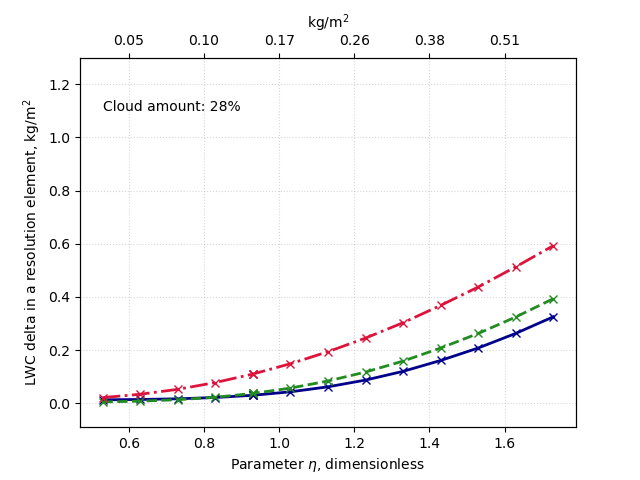

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


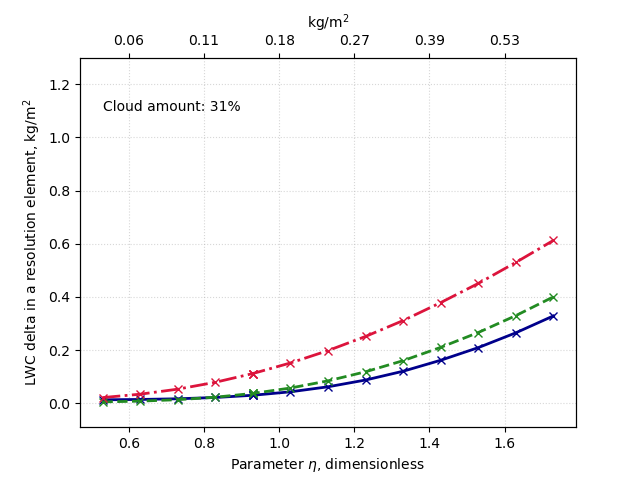

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


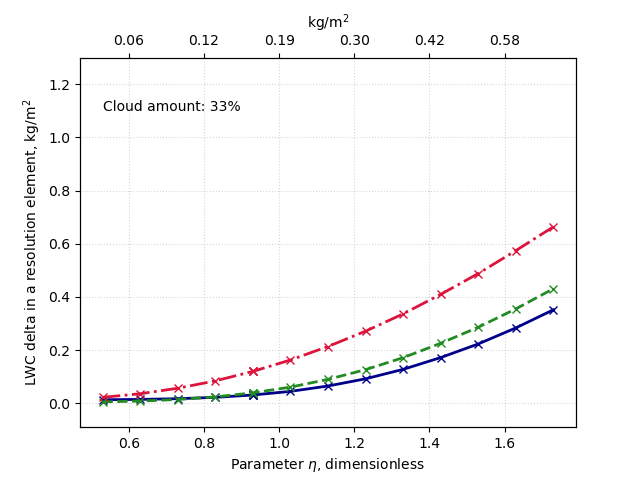

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


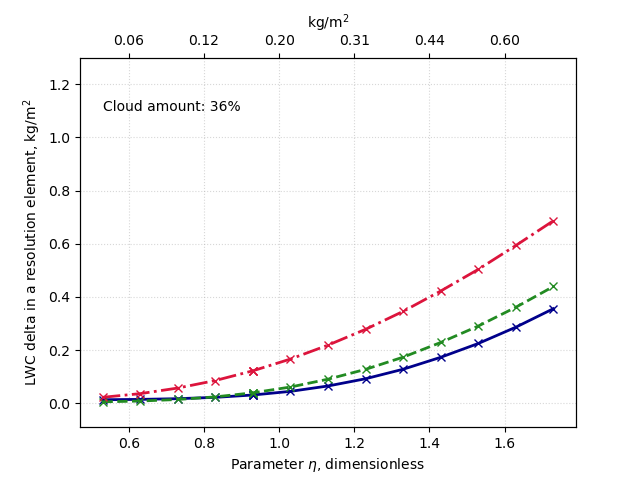

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


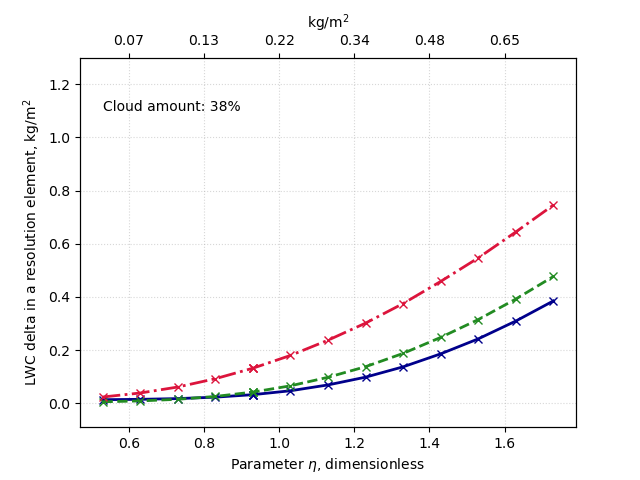

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


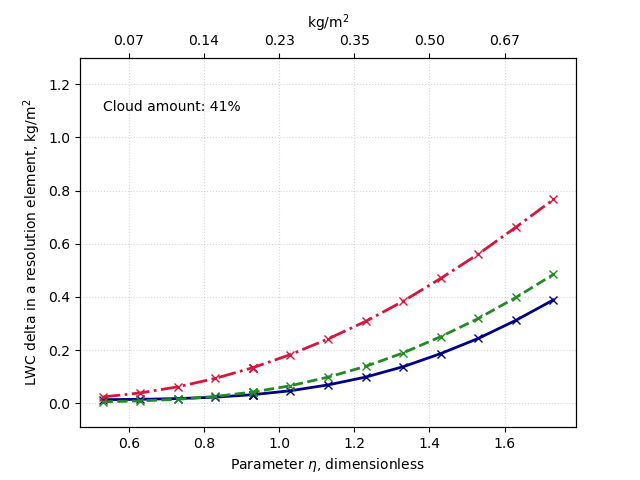

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


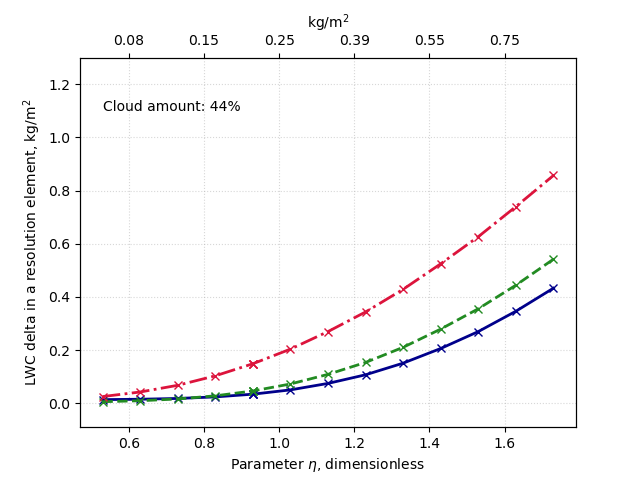

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


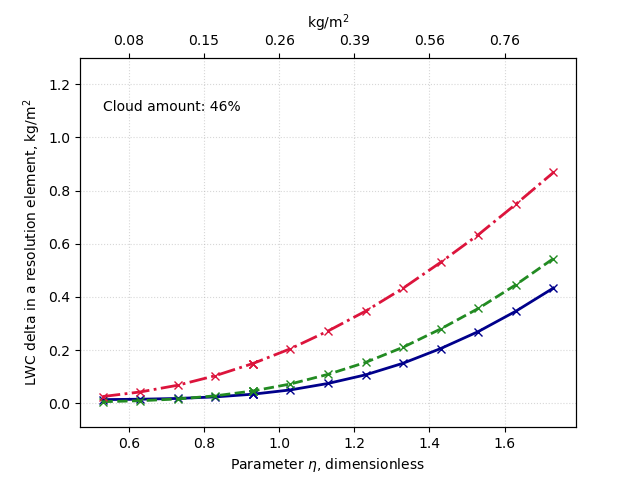

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


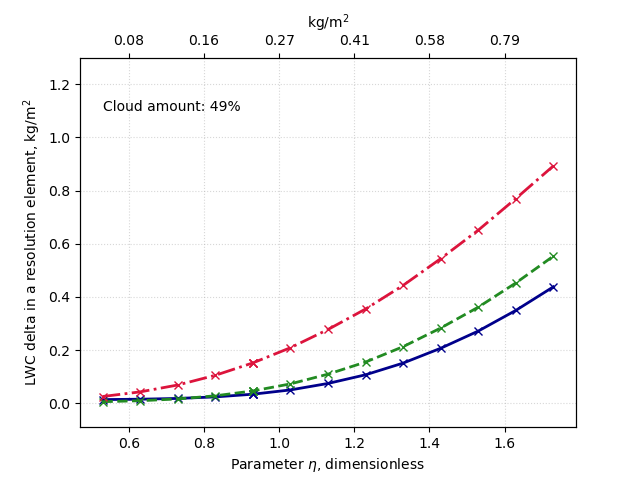

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


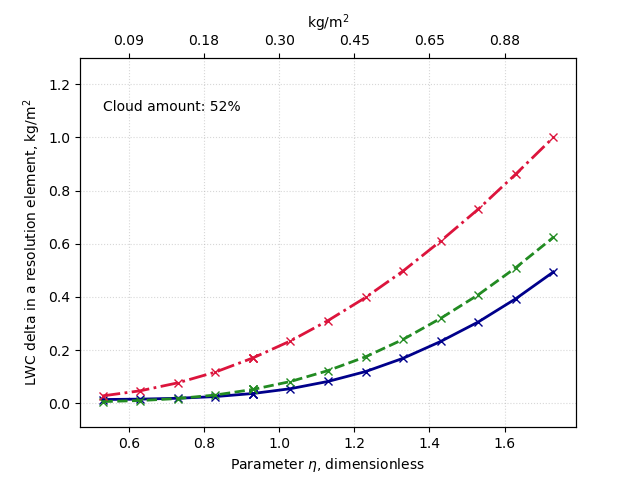

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


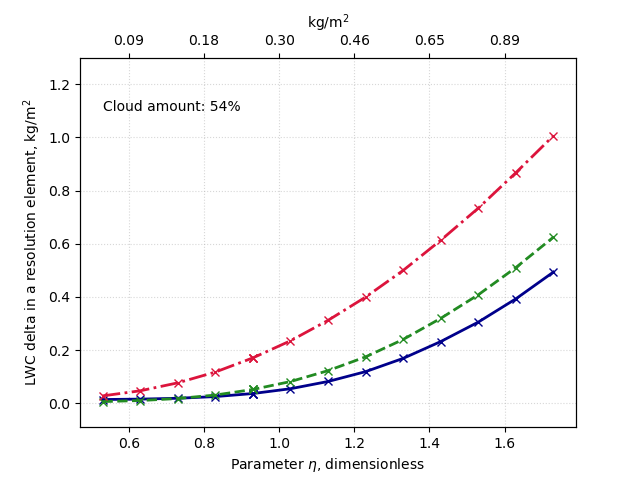

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


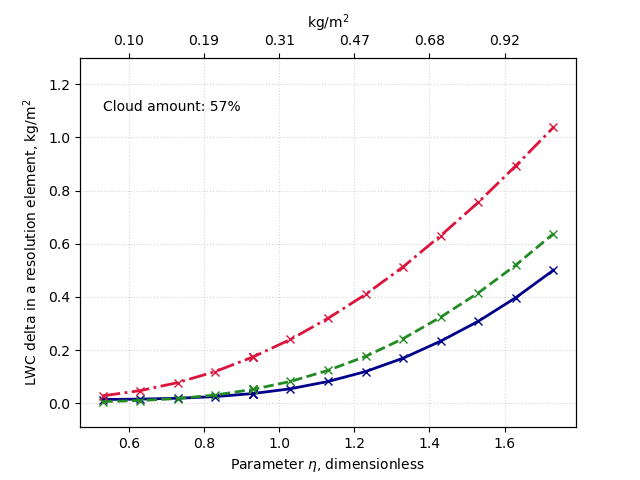

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


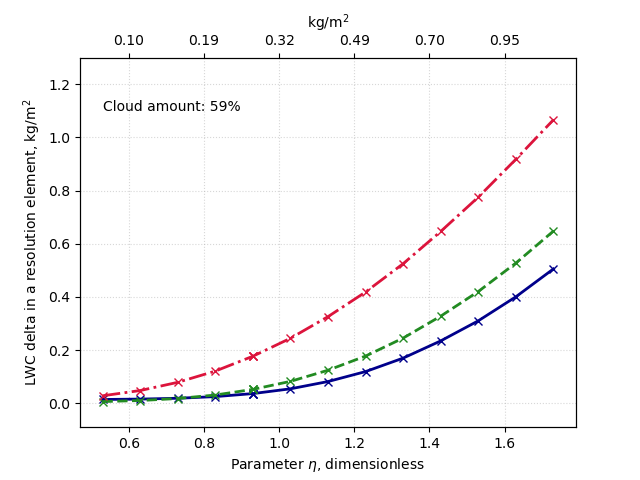

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


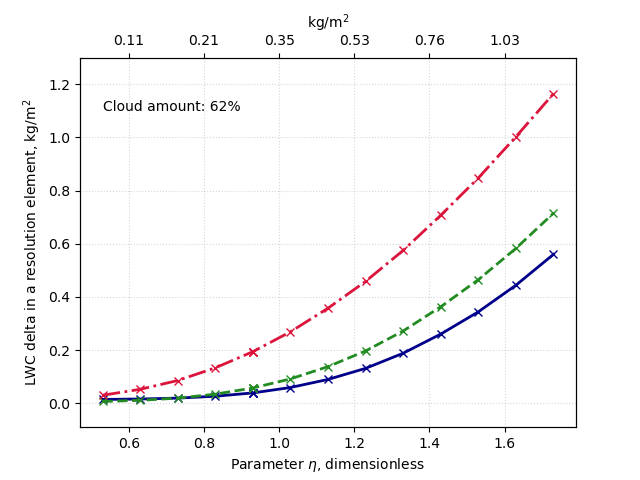

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


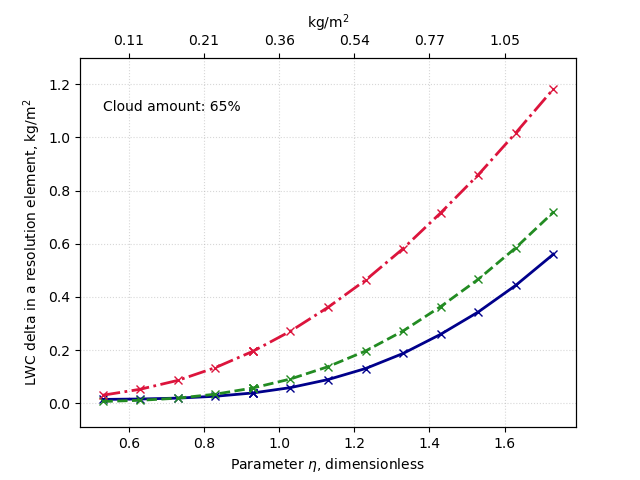

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


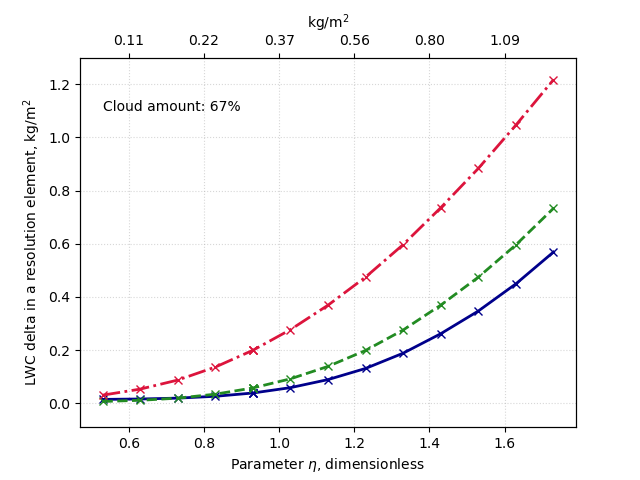

/tmp/ipykernel_55398/1884585818.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


In [184]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'eta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

# errorbars
for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'W_true', 'Wrs',
        )
    eta, W_true, Wrs = bind(eta, *map(means, W))
    plt.plot(eta, (W_true - Wrs), marker='x', color='darkblue', linewidth=2, linestyle='-')

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'W_true', 'Wrs',
        )
    eta, W_true, Wrs = bind(eta, *map(means, W))
    plt.plot(eta, (W_true - Wrs), marker='x', color='forestgreen', linewidth=2, linestyle='--')
    
    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=89).get(
           'eta', 'W_true', 'Wrs',
        )
    eta, W_true, Wrs = bind(eta, *map(means, W))
    plt.plot(eta, (W_true - Wrs), marker='x', color='crimson', linewidth=2, linestyle='-.')

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'LWC delta in a resolution element, kg/m$^2$')
    
    plt.ylim((-0.09, 1.3))
    plt.text(np.min(eta), 1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(eta, W_true)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
#     ax2.set_xlabel(r'True LWC in a resolution element (average of the averages), kg/m$^2$')
    ax2.set_xlabel(r'kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)